# Airline Passenger Satisfaction Analysis

Customer satisfaction scores from 120,000+ airline passengers, including additional information about each passenger, their flight, and type of travel, as well as ther evaluation of different factors like cleanliness, comfort, service, and overall experience.

In [33]:
import pandas as pd
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
pd.set_option('display.max_rows', 1000)

pd.set_option('display.max_rows', 500)

import missingno as msno

sns.set(style = "darkgrid")

In [2]:
df =pd.read_csv(r"C:\Users\jaina\Documents\Airline\airline_passenger_satisfaction.csv")
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

<AxesSubplot:>

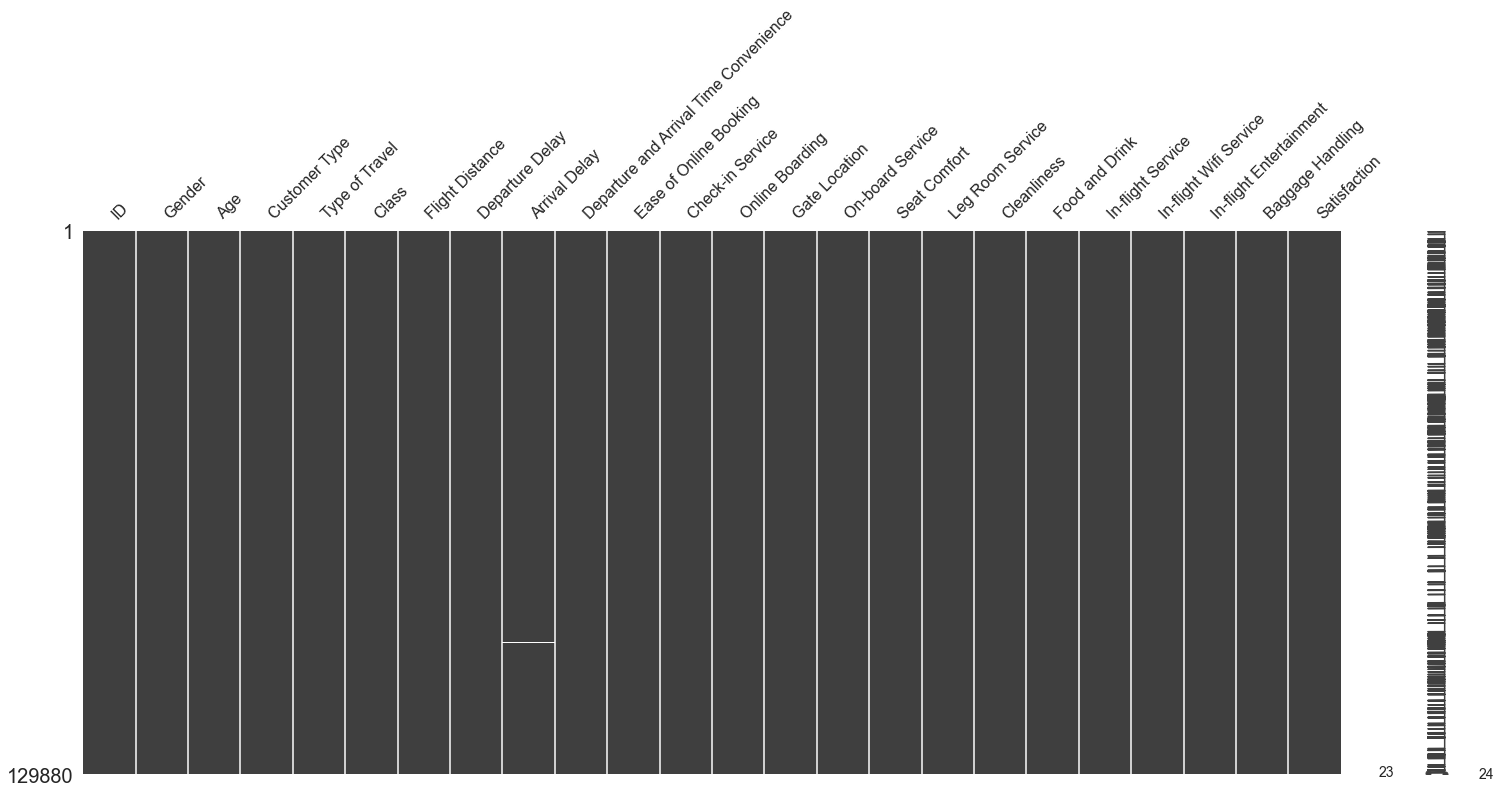

In [4]:
msno.matrix(df)

<AxesSubplot:>

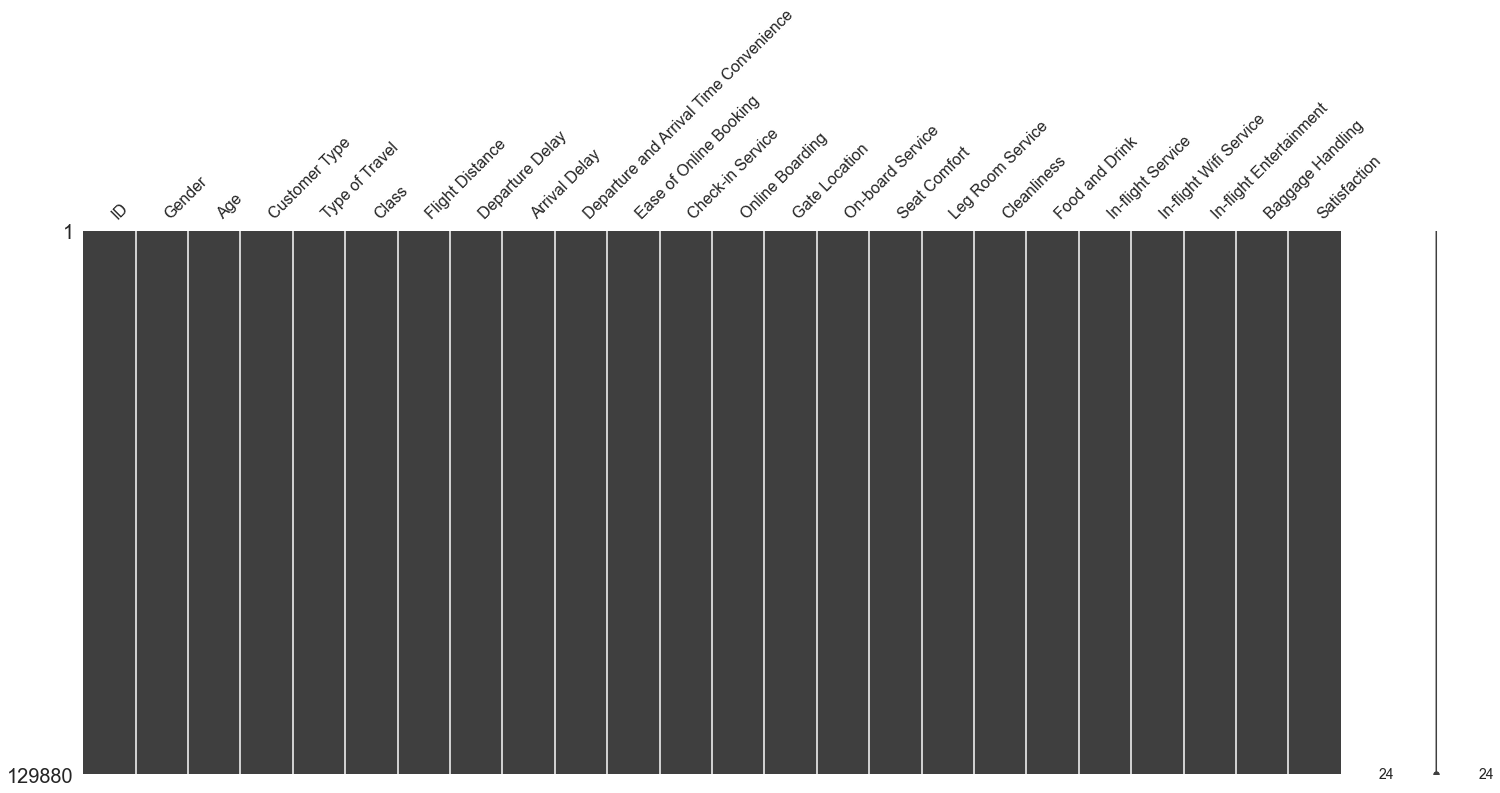

In [5]:
df.interpolate(method = 'linear', limit_direction = 'backward', inplace = True)
msno.matrix(df)

In [6]:
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [11]:
df["Class"].replace(['Economy', 'Economy Plus', "Business"], [1,2,3], inplace = True)
df["Gender"] = pd.get_dummies(df["Gender"], drop_first = True) 
df["Customer Type"] = pd.get_dummies(df["Customer Type"], drop_first = True) 
df["Type of Travel"] = pd.get_dummies(df["Type of Travel"], drop_first = True)
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,0,3,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,0,35,1,0,3,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,1,41,1,0,3,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,1,50,1,0,3,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,0,49,1,0,3,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,1,28,1,1,2,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,1,41,1,1,2,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,1,42,1,1,2,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,1,50,1,1,2,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


<AxesSubplot:>

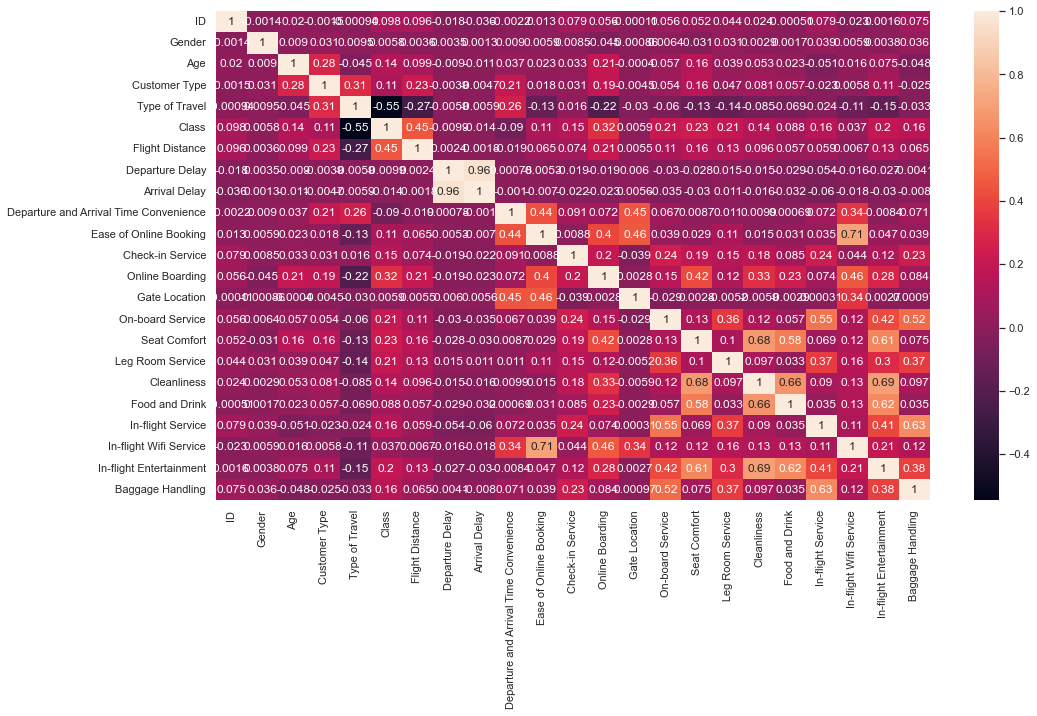

In [18]:
#sns.heatmap(df[["ID","Age","Flight Distance", "Departure Delay", "Departure and Arrival Time Convenience", "Ease of Online Booking", "Check-in Service", "Online Boarding", "Gate Location","On-board Service", "Seat Comfort", "Leg Room Service", "Cleanliness", "Food and Drink", "In-flight Service", "In-flight Wifi Service", "In-flight Entertainment", "Baggage Handling"]])
df_hm = df.drop("Satisfaction", axis = 1)
sns.heatmap(df_hm.corr(), annot = True)

# Decision_Tree

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X =df.drop('Satisfaction', axis = 1)
y =  pd.get_dummies(df["Satisfaction"], drop_first = True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
 from sklearn.tree import DecisionTreeClassifier

In [23]:
dtree= DecisionTreeClassifier()

In [24]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
predictions = dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(confusion_matrix(predictions, y_test))
print('\n')
print(classification_report(predictions, y_test))

[[20907  1048]
 [ 1030 15979]]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     21955
           1       0.94      0.94      0.94     17009

    accuracy                           0.95     38964
   macro avg       0.95      0.95      0.95     38964
weighted avg       0.95      0.95      0.95     38964



# Random_Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier    #ensemble - group of entity performing a specific task

In [29]:
rfc = RandomForestClassifier(n_estimators = 200)

In [30]:
rfc.fit(X_train, y_train)

C:\Users\jaina\AppData\Local\Temp\ipykernel_13844\1542427849.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

In [31]:
pred = rfc.predict(X_test)
pred

array([0, 0, 1, ..., 1, 0, 0], dtype=uint8)

In [32]:
print(confusion_matrix(pred, y_test))
print('\n')
print(classification_report(pred, y_test))

[[21492   972]
 [  445 16055]]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97     22464
           1       0.94      0.97      0.96     16500

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964

